In [114]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import sklearn 

In [115]:
def count_plot(column_name, hue = None, rotation = 0):
    """
    1) input : column name, column data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) i use bar_label to show frequency of each unique values above each column in graph
    """
    graph = sns.countplot(x = column_name, data = df, hue = hue, order = df[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
    plt.xticks(rotation = rotation)
    plt.show()
    
def box_plot(x_axis = None, y_axis = None):
    """
    input : column name, column data type must be numeric
    output : box plot to see distribution of column values such as min,max,mean,medien,std
    """
    sns.boxplot(x = x_axis, y = y_axis, data = df)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()
    
    
def finde_level(sentence):
    sentence = sentence.split(" out of ")
    return sentence[0]

def finde_level_number(sentence):
    sentence = sentence.split(" out of ")
    return sentence[-1]

import scipy.stats as stat
import pylab

def plot_data(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()
    
from sklearn.preprocessing import MinMaxScaler

def normalization_MinMaxScaler(X_train, X_test):
    minmax = MinMaxScaler()
    X_train_scaled = minmax.fit_transform(X_train)
    X_test_scaled = minmax.transform(X_test)
    return X_train_scaled, X_test_scaled

In [116]:
df = pd.read_csv('/kaggle/input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [117]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


<h1>Exploratory Data Analysis</h1>
<div style="background-color:Tomato;">
This step corresponds to:
    <ul>
        <li>cleaning  the dataset, columns</li>
    <li>building new features</li>
    <li>picking the best columns for the model</li>
    </ul>
</br>
</div>

<h2>Column names: </h2>

In [118]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

**As we see, column names contain space in it so we are going to remove them**

In [119]:
new_list = [i.replace(" ","") for i in list(df.columns) ]
df.columns = new_list

<h2>Checking for null values</h2>

<Axes: >

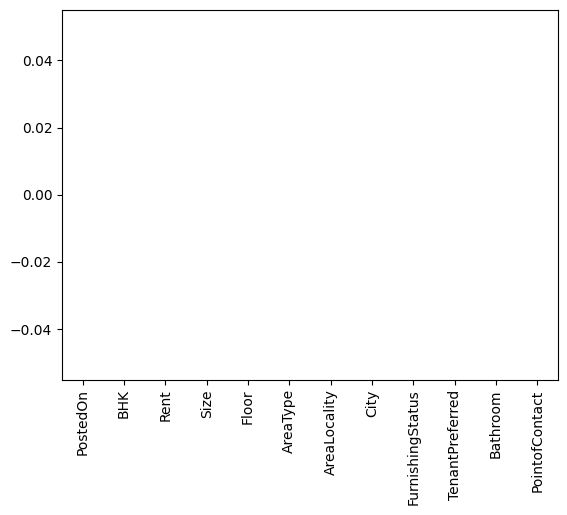

In [120]:
#Check for null values
df.isna().sum().plot(kind='bar')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PostedOn          4746 non-null   object
 1   BHK               4746 non-null   int64 
 2   Rent              4746 non-null   int64 
 3   Size              4746 non-null   int64 
 4   Floor             4746 non-null   object
 5   AreaType          4746 non-null   object
 6   AreaLocality      4746 non-null   object
 7   City              4746 non-null   object
 8   FurnishingStatus  4746 non-null   object
 9   TenantPreferred   4746 non-null   object
 10  Bathroom          4746 non-null   int64 
 11  PointofContact    4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


<h2>PostedOn: </h2>

In [122]:
#Convert data type
df['PostedOn'] = pd.to_datetime(df['PostedOn'])
print('Type of Posted_On columns ', df["PostedOn"].dtypes)

#Create new columns
df['Year'] = df["PostedOn"].dt.year
df['Month'] = df["PostedOn"].dt.month
df['Weekday'] = df["PostedOn"].dt.weekday

#Year used 
print('Year used in the dataset: ', df['Year'].unique())
print('Month used in the dataset: ', df['Month'].unique())
print('Number of rows for each month: ',  df['Month'].value_counts())

Type of Posted_On columns  datetime64[ns]
Year used in the dataset:  [2022]
Month used in the dataset:  [5 7 4 6]
Number of rows for each month:  Month
6    1859
5    1681
7     978
4     228
Name: count, dtype: int64


Text(0.5, 0, 'Month 7')

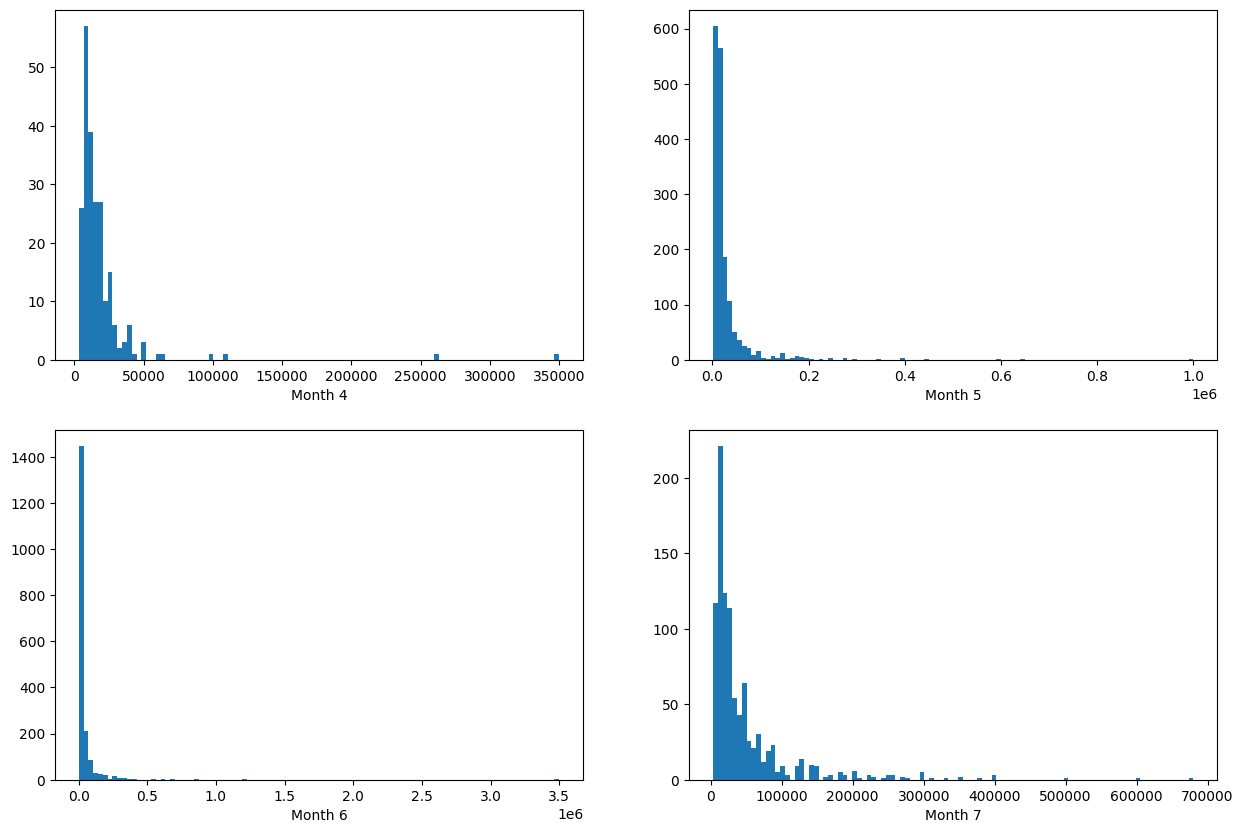

In [123]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].hist(df[df['Month']==4]['Rent'], bins=100)
ax[0,0].set_xlabel('Month 4')
ax[0,1].hist(df[df['Month']==5]['Rent'], bins=100)
ax[0,1].set_xlabel('Month 5')
ax[1,0].hist(df[df['Month']==6]['Rent'], bins=100)
ax[1,0].set_xlabel('Month 6')
ax[1,1].hist(df[df['Month']==7]['Rent'], bins=100)
ax[1,1].set_xlabel('Month 7')

**For each month, the rent ditribution is right skewed and contain so we are going to use median to show the average rent for each month**

In [124]:
pd.pivot_table(df, values='Rent', columns='Month', aggfunc='median')

Month,4,5,6,7
Rent,13000.0,15000.0,15000.0,25000.0


<h2>Floor</h2>

In [125]:
#Split the floor column into two columns: level and floor_number 
df['level'] = df['Floor'].apply(finde_level)
df['floorNumber'] = df['Floor'].apply(finde_level_number)

#In level and Floornumber  replace values in columns 
df['level'] = df['level'].replace({'Ground':0, 'Upper Basement':0, 'Lower Basement':0})
df['floorNumber'] = df['floorNumber'].replace('Ground',1)

#Convert data type
df['level'] = df['level'].astype('int')
df['floorNumber'] = df['floorNumber'].astype('int')
df['Floor'] = df['Floor'].astype('string')

**Level**

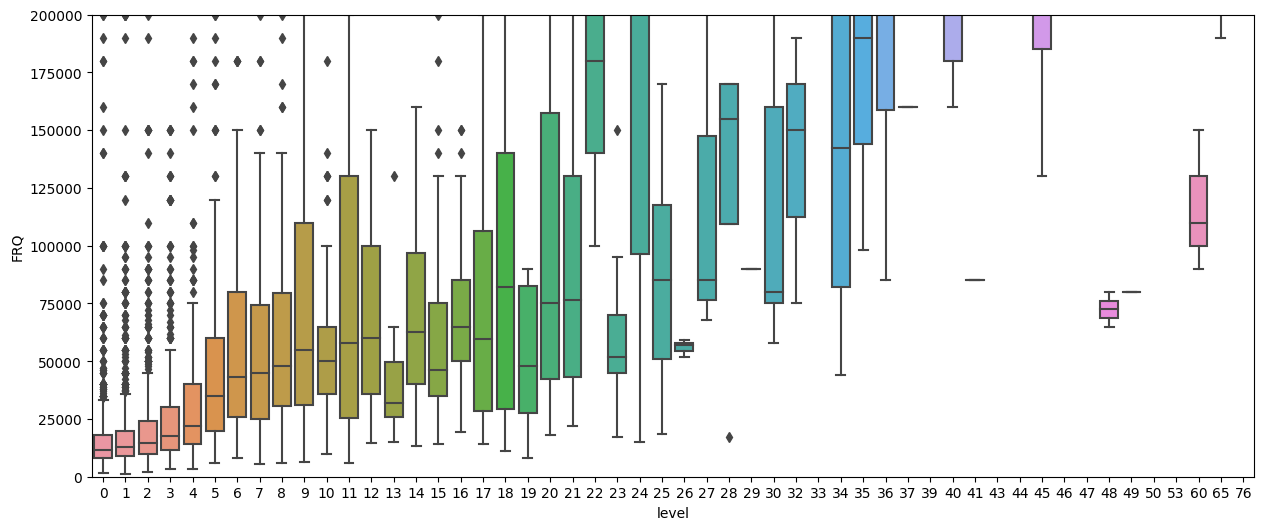

In [126]:
plt.figure(figsize = (15,6))
plt.ylim(0,200000)
box_plot(x_axis = "level", y_axis = "Rent")

**FloorNumber**

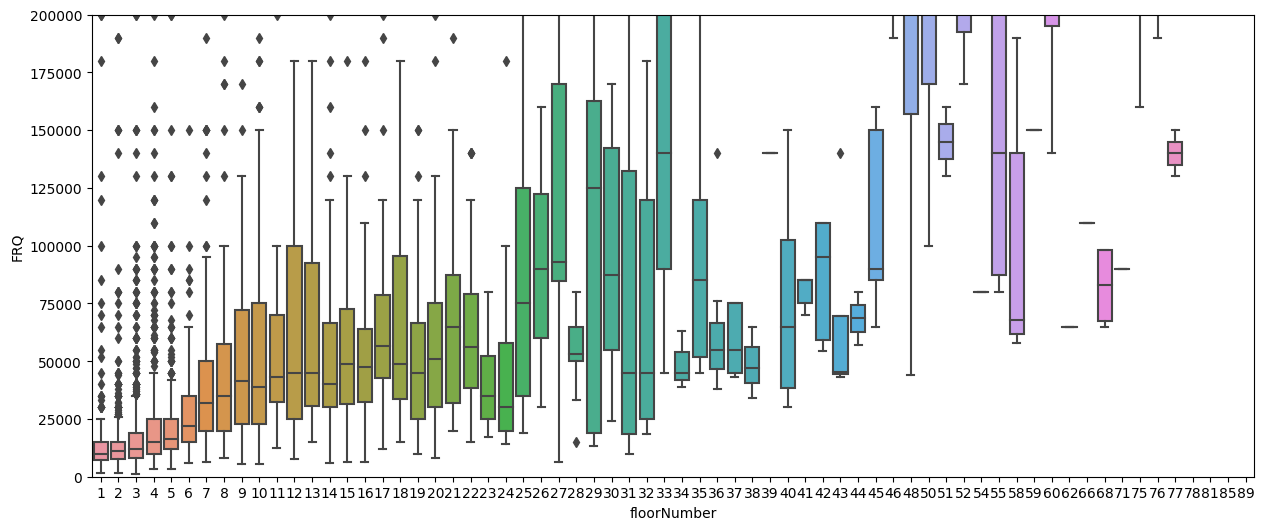

In [127]:
plt.figure(figsize = (15,6))
plt.ylim(0,200000)
box_plot(x_axis = "floorNumber", y_axis = "Rent")

<div><h4>Observation: </h4>From the two observations,  we see that the rent mean  increase continuously from the level 0 to  9 like from floornumber 0 to 8 , however later that tendency is in disorder... And there are a lot of outliers
</div>

<h2>BHK</h2>

This talk about the numbers of bathroom and kitchen

In [128]:
df['BHK']= df['BHK'].astype('int')

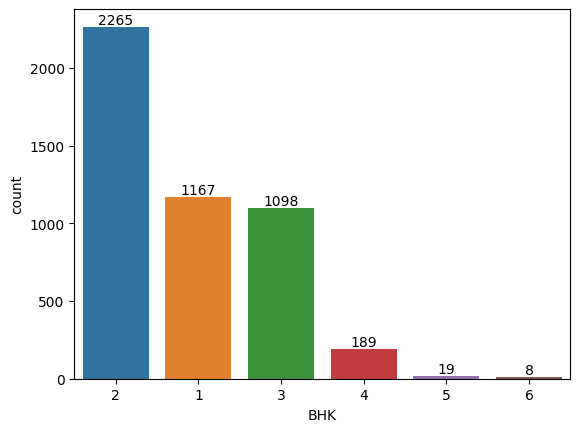

In [129]:
#Distribution of the BHK
count_plot(column_name = "BHK")

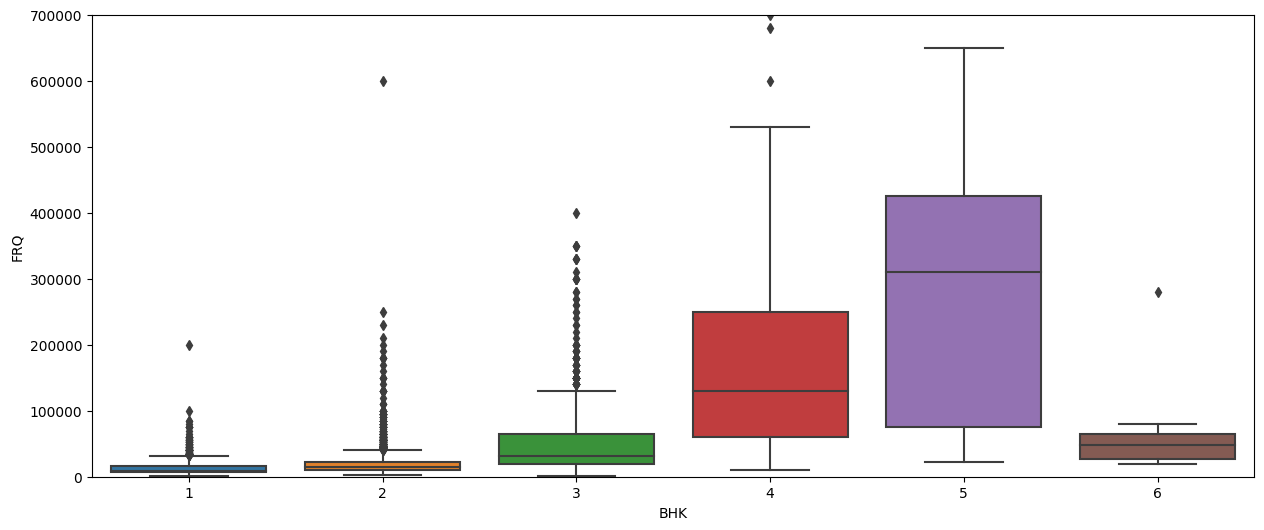

In [130]:
#Relation of rent and BHK 
plt.figure(figsize = (15,6))
plt.ylim(0,700000)
box_plot( x_axis = "BHK", y_axis = "Rent")

<h2>Size</h2>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


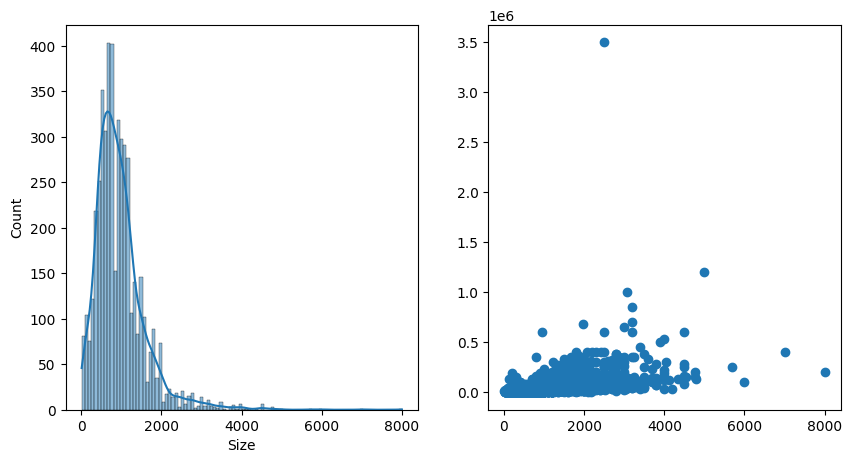

In [131]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df['Size'], bins=100, kde=True, ax=ax[0])
ax[1].scatter(df['Size'], df['Rent'])

**This shows that Size column is right skewed so we are going to use logarithme to correct  that**

<h4>Build new feature</h4>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


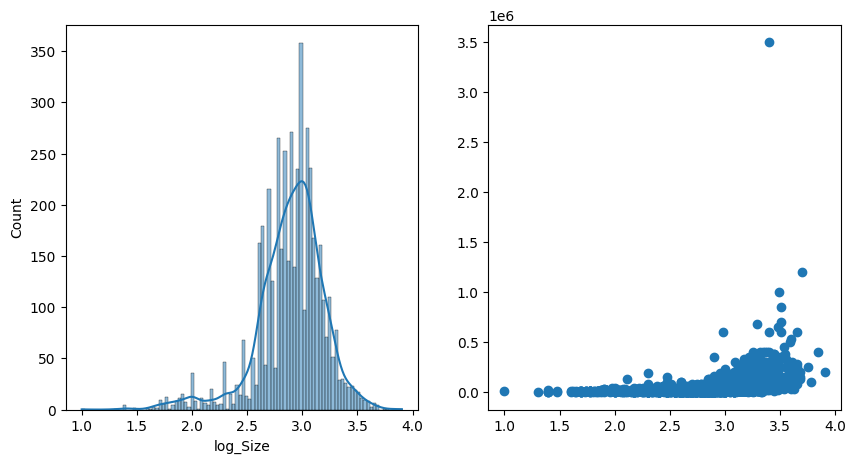

In [132]:
#Use logarithm to create normal distribution
df['log_Size'] = np.log10(df['Size'])

#PLot
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df['log_Size'], bins=100, kde=True, ax=ax[0])
ax[1].scatter(df['log_Size'], df['Rent'])

**This plot shows that the spread is still not perfet but better as we can see in  the following graph because if it was normal, all the points would align on the line.**

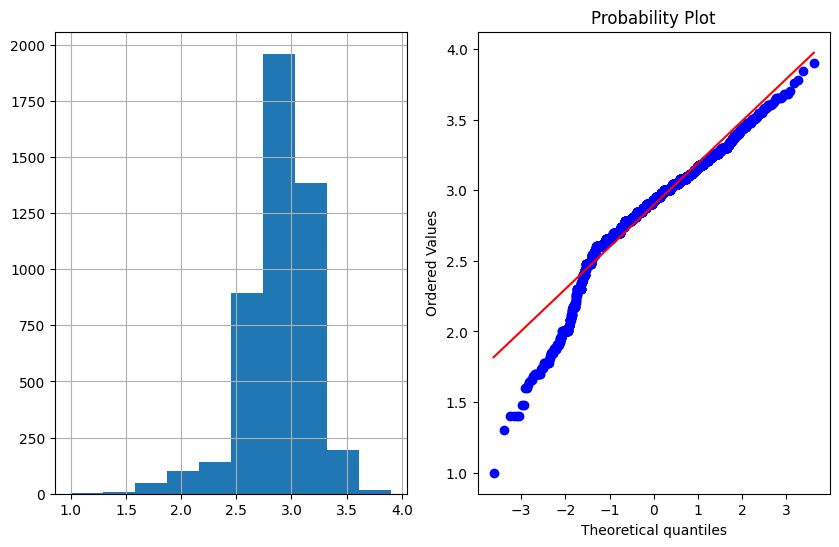

In [133]:
plot_data(df, 'log_Size')

<h2>Area type</h2>

In [134]:
print('Number of unique values: ', df['AreaType'].nunique())
df['AreaType'] = df['AreaType'].astype('string')

Number of unique values:  3


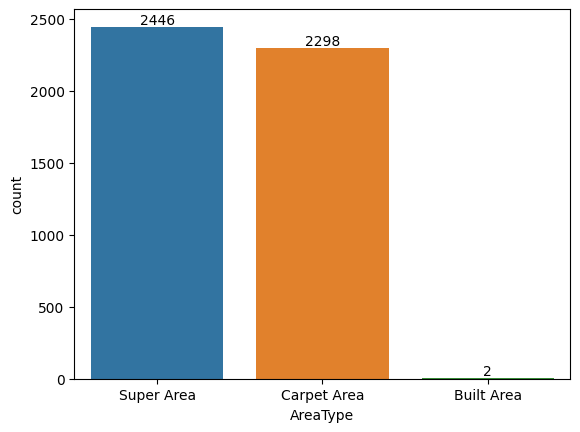

In [135]:
#Let's plot the distribution of AREA TYPE
count_plot(column_name='AreaType')

<h3>Observation:</h3>
- The value builtarea has really low values: 2 compared to other values: Super Area and Carpet Area  

<h2>City</h2>

In [136]:
print('Number of unique values: ', df['City'].nunique())

Number of unique values:  6


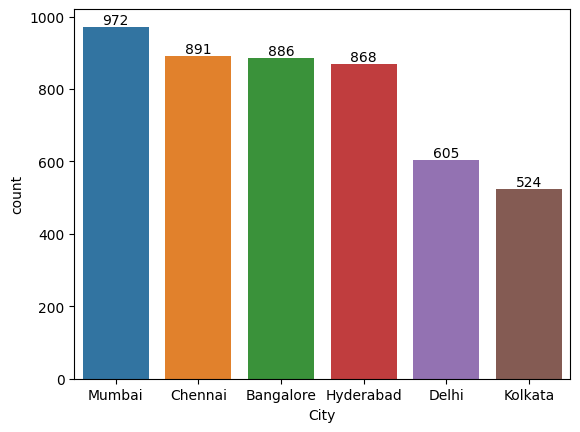

In [137]:
count_plot(column_name='City')

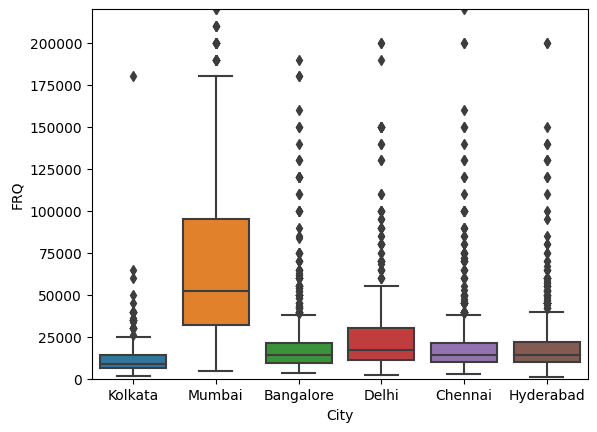

In [138]:
#box_plot(x_axis = "City", y_axis = "Rent")
sns.boxplot(x = "City", y = "Rent", data = df)
plt.xlabel("City")
plt.ylabel("FRQ")
plt.ylim([0, 220000])
plt.show()

<h2>Furnishing status</h2>

In [139]:
print('Number of unique values: ', df['FurnishingStatus'].nunique())

Number of unique values:  3


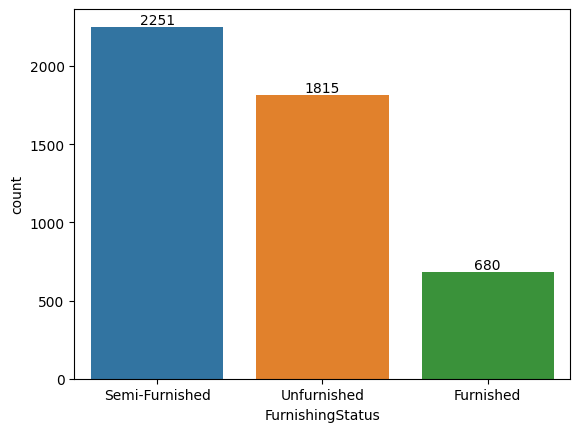

In [140]:
count_plot(column_name='FurnishingStatus')

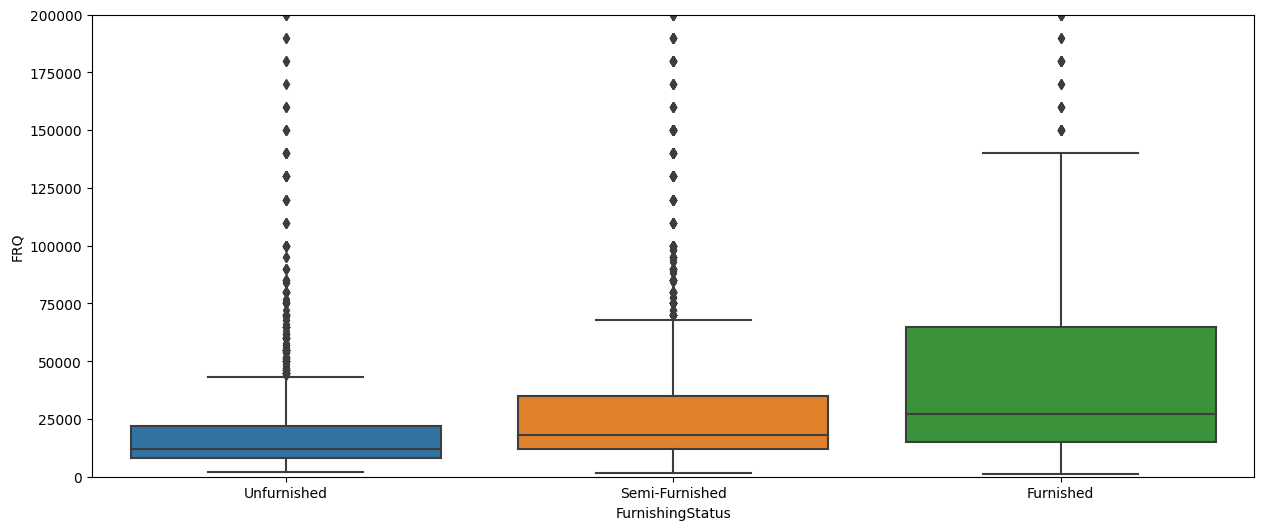

In [141]:
plt.figure(figsize = (15,6))
plt.ylim(0,200000)
box_plot(x_axis = 'FurnishingStatus', y_axis = "Rent")

<h3>Observation:</h3>
The dataset contain a lot of outliers , however we can say that unfurnished has the lowest median values, next is semi-furnished and furnished has the highest median value </br>
And there are disproportion among the values

<h2>TenantPreferred</h2>

In [142]:
print('Number of unique values: ', df['TenantPreferred'].nunique())

Number of unique values:  3


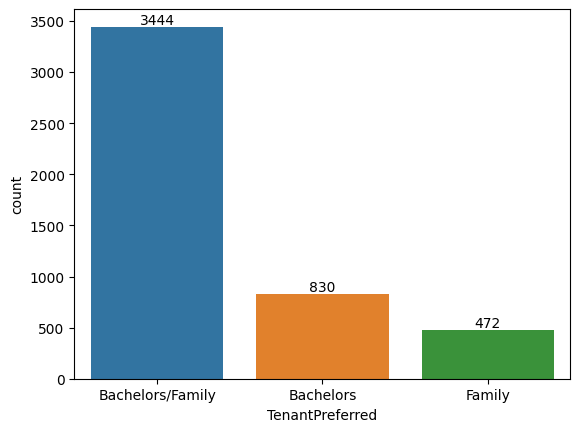

In [143]:
count_plot(column_name='TenantPreferred')

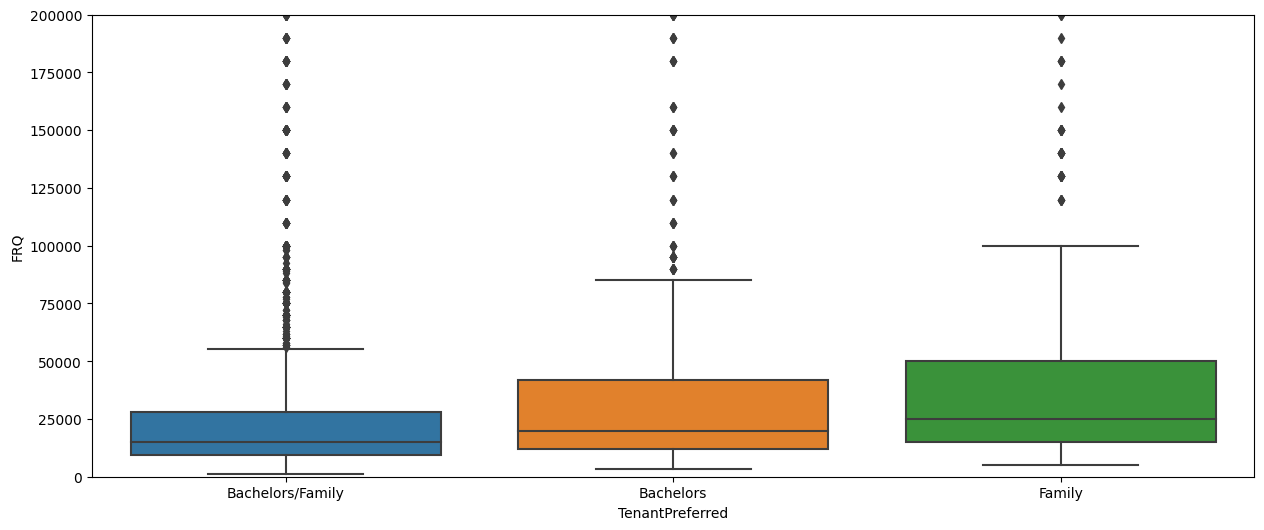

In [144]:
plt.figure(figsize = (15,6))
plt.ylim(0,200000)
box_plot(x_axis = 'TenantPreferred', y_axis = "Rent")

<h2>Bathroom</h2>

In [145]:
print('Number of unique values: ', df['Bathroom'].nunique())

Number of unique values:  8


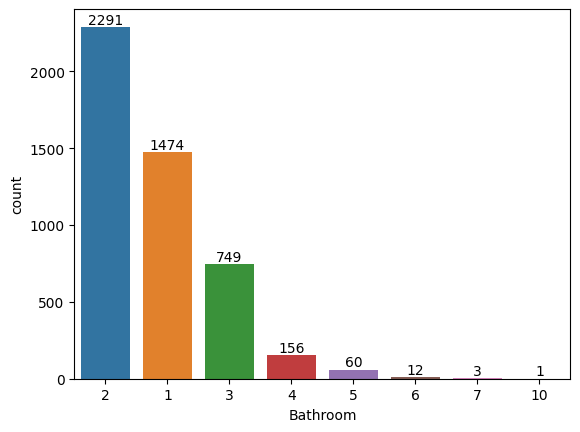

In [146]:
count_plot(column_name = "Bathroom") 

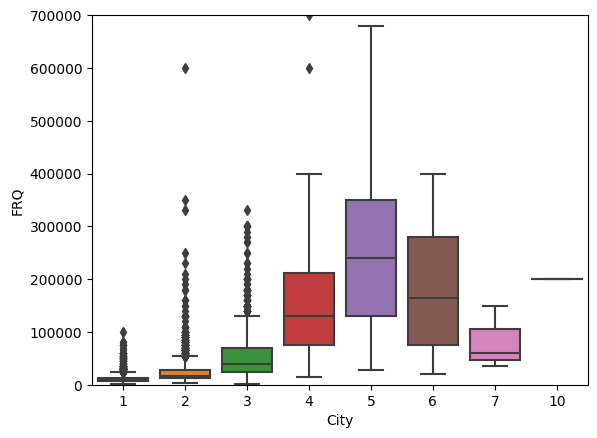

In [147]:
sns.boxplot(x = "Bathroom", y = "Rent", data = df)
plt.xlabel("City")
plt.ylabel("FRQ")
plt.ylim([0, 700000])
plt.show()

<h2>PointofContact</h2>

In [148]:
print('Number of unique values: ', df['PointofContact'].nunique())

Number of unique values:  3


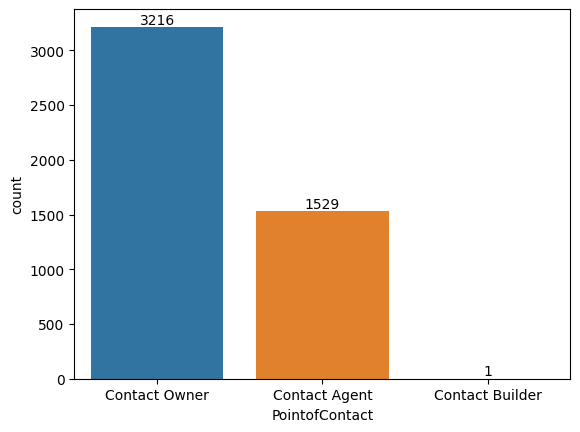

In [149]:
count_plot(column_name = 'PointofContact') 

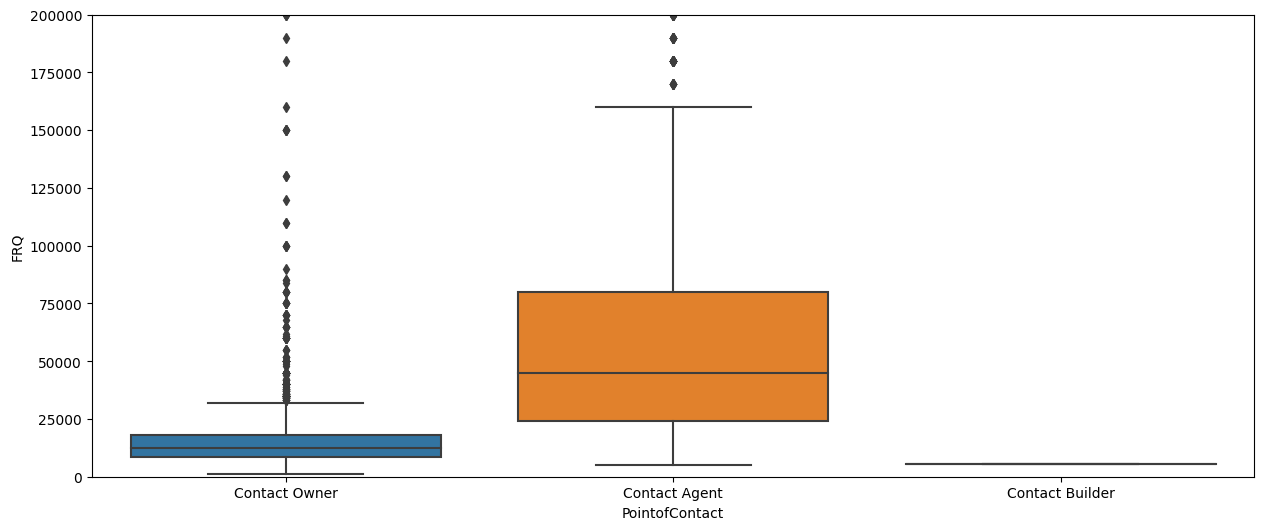

In [150]:
plt.figure(figsize = (15,6))
plt.ylim(0,200000)
box_plot(x_axis = 'PointofContact', y_axis = "Rent")

<h2>Locality target</h2>

In [151]:
print('Number of unique_values: ', df['AreaLocality'].nunique())

Number of unique_values:  2235


**This column has a lot of unique possibles so first we are going to encode it into its count and mean**

In [152]:
locality_target = df.groupby('AreaLocality')['Rent'].agg(['count','mean']).reset_index()
locality_target.columns = ['AreaLocality', 'AreaLocality_count', 'AreaLocality_mean']
#Merge AreaLocality with Rent
df = locality_target.merge(df, on='AreaLocality')

In [153]:
print('Number of unique_count: ', df['AreaLocality_count'].nunique())
print('Number of unique_count: ', df['AreaLocality_mean'].nunique())

Number of unique_count:  24
Number of unique_count:  534


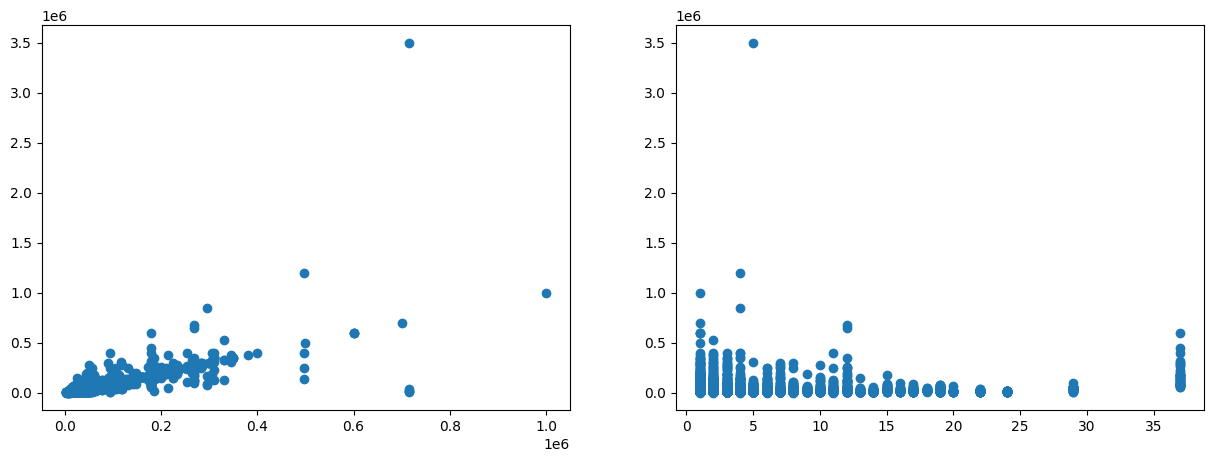

In [154]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(df['AreaLocality_mean'], df['Rent'])
ax[1].scatter(df['AreaLocality_count'], df['Rent'])

<h2>Rent</h2>

(0.0, 100000.0)

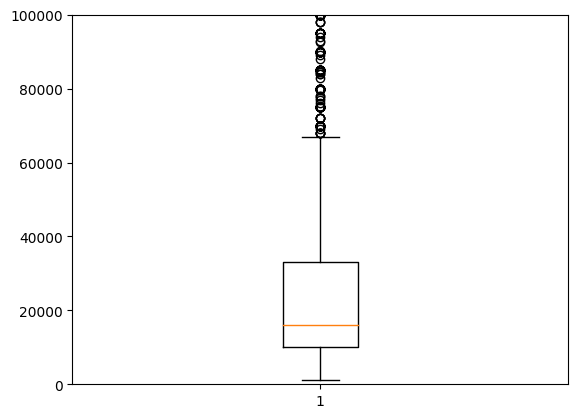

In [155]:
plt.boxplot(df['Rent'])
plt.ylim(0,100000 )

**Let's now look at the distribution of Rent**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rent', ylabel='Count'>

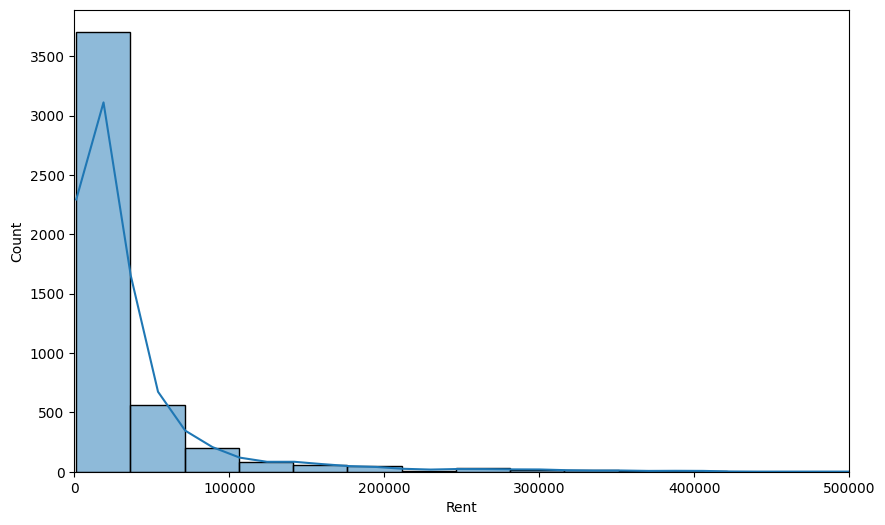

In [156]:
plt.figure(figsize = (10,6))
plt.xlim(0,500000 )
sns.histplot(df['Rent'], kde=True, bins=100)

**As we see, there are lot of outliers, let's determine how many they are**

(0.0, 100000.0)

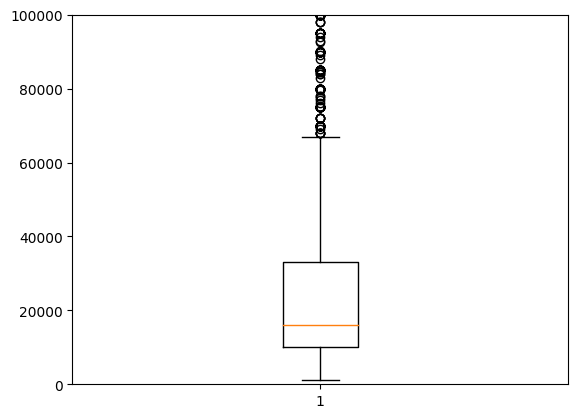

In [157]:
plt.boxplot(df['Rent'])
plt.ylim(0,100000 )

In [158]:
q1 = df['Rent'].quantile([0.25]).values
q3 = df['Rent'].quantile([0.75]).values
mini = df['Rent'].min()
maxi = df['Rent'].max()
iqr = q3-q1

lower_fence = q1[0] - 1.5*iqr[0]
upper_fence = q3[0] + 1.5*iqr[0]

pd_lower = df['Rent'].between(mini, lower_fence)
pd_upper = df['Rent'].between(upper_fence, maxi)


print("Number of outliers lower than lower_fence: ", df[pd_lower].shape[0]/df.shape[0])
print("Number of outliers lower than upper_fence: ", df[pd_upper].shape[0]/df.shape[0])

Number of outliers lower than lower_fence:  0.0
Number of outliers lower than upper_fence:  0.10956595027391487


**Let's remove these outliers**

In [159]:
df_without_outliers = df[df['Rent']< upper_fence]
new_df = df[df['Rent']< upper_fence]  

**Let's look at the histogram of Rent now with the new dataframe without outliers**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rent', ylabel='Count'>

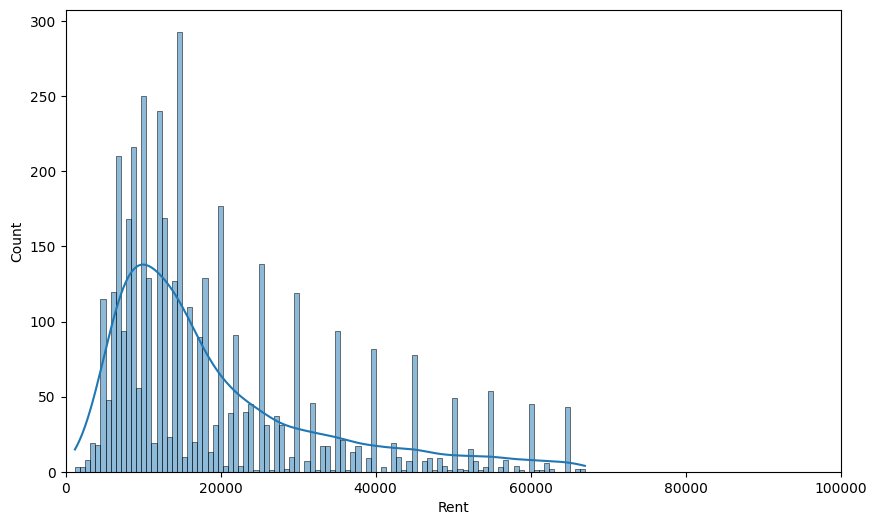

In [160]:
plt.figure(figsize = (10,6))
plt.xlim(0,100000 )
sns.histplot(new_df['Rent'], kde=True, bins=100)

**Let's create a new feature log_Rent  which tranforms the data into normal  with the new dataframe**

In [161]:
new_df['log_Rent'] = np.log10(new_df['Rent'])

/tmp/ipykernel_30/2393903500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['log_Rent'] = np.log10(new_df['Rent'])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='log_Rent', ylabel='Count'>

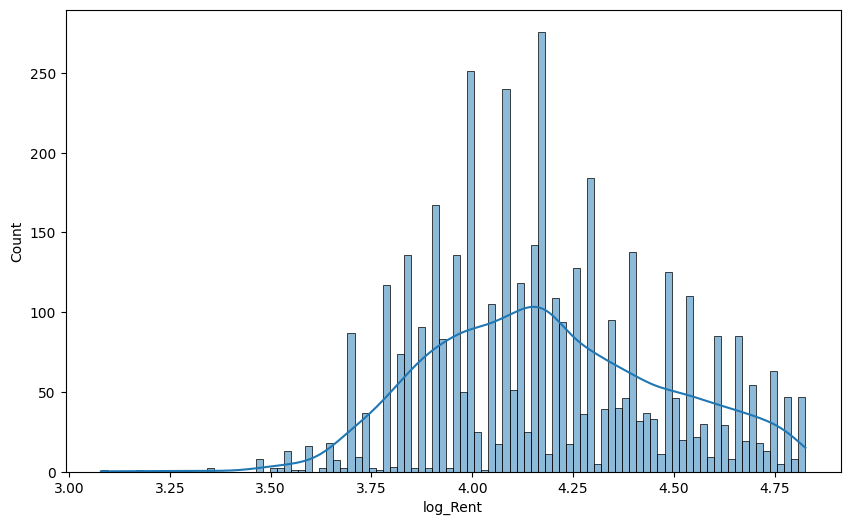

In [162]:
plt.figure(figsize = (10,6))
#plt.xlim(0,100000 )
sns.histplot(new_df['log_Rent'], kde=True, bins=100)

**As we see the data is more normal**

<h2>Drop variables: </h2>

In [163]:
new_df = new_df.drop(columns=['PostedOn', 'Floor','AreaLocality',])

In [164]:
new_df['City'] = df['City'].astype('string')
new_df['FurnishingStatus'] = new_df['FurnishingStatus'].astype('string')
new_df['TenantPreferred'] =new_df['TenantPreferred'].astype('string')
new_df['PointofContact'] = new_df['PointofContact'].astype('string')

<h2>FEATURE SELECTION</h2>

<h3>Correlation</h3>

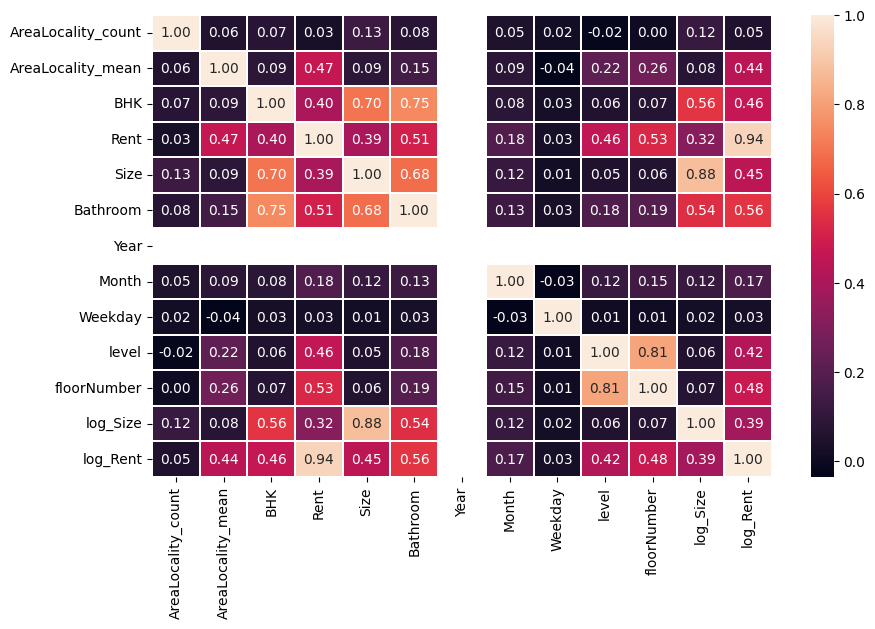

In [165]:
plt.figure(figsize = (10,6))
sns.heatmap(new_df.select_dtypes(exclude = 'string').corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

<h3>Mutual information</h3>

In [166]:
numerical = new_df.select_dtypes(exclude='string').columns
categorical = new_df.select_dtypes(include='string').columns

In [167]:
for i in new_df.select_dtypes("string"):
    new_df[i],_ = new_df[i].factorize()
    
X = new_df.drop(columns=['log_Rent', 'Rent'])
y = new_df['log_Rent']
    
discrete_features = X.dtypes == int

In [168]:
mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
mi_scores = pd.Series(mi_scores, name="MI scores", index = X.columns)
mi_scores.sort_values(ascending=False)

AreaLocality_mean     1.273788
Size                  0.279084
log_Size              0.272302
Bathroom              0.228431
floorNumber           0.196787
BHK                   0.170456
City                  0.169264
PointofContact        0.149717
level                 0.134593
AreaType              0.059375
FurnishingStatus      0.037042
AreaLocality_count    0.032740
TenantPreferred       0.026129
Month                 0.014563
Year                  0.000000
Weekday               0.000000
Name: MI scores, dtype: float64

**Lets take the columuns where mutual_information>0.1**

In [169]:
mi_scores = mi_scores[mi_scores>0.1]
col = mi_scores.index.tolist()
mi_scores.sort_values(ascending=False)

AreaLocality_mean    1.273788
Size                 0.279084
log_Size             0.272302
Bathroom             0.228431
floorNumber          0.196787
BHK                  0.170456
City                 0.169264
PointofContact       0.149717
level                0.134593
Name: MI scores, dtype: float64

**Let's look at the correlation**

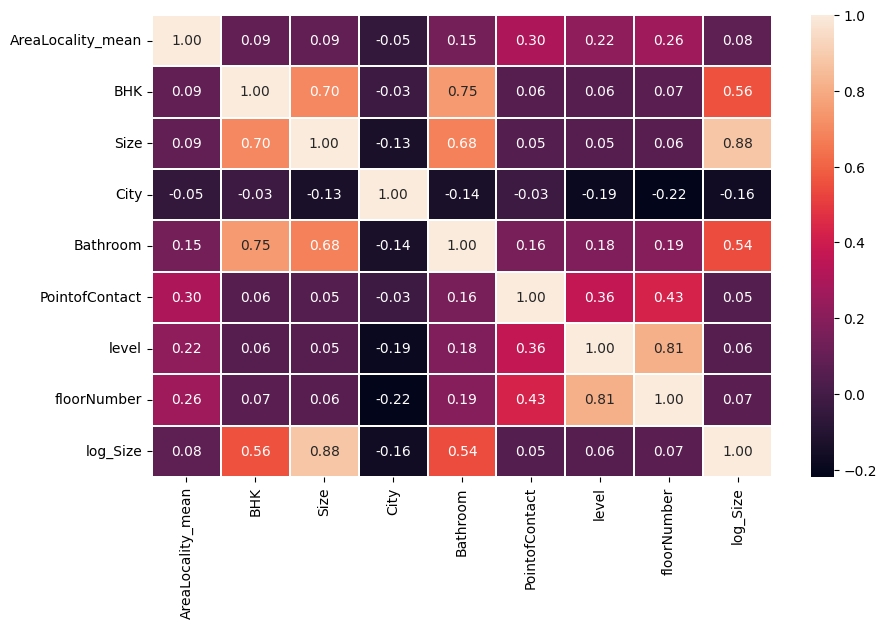

In [170]:
plt.figure(figsize = (10,6))
sns.heatmap(new_df[col].select_dtypes(exclude = 'string').corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

<div>From the correlation plot, we see that: 
<ul>
    <li>Size has high correlation with log_Size, BHK, Bathroom</li>
    <li>FloorNumber has high correlation with Level</li>
</ul>
So the columns left are Size, City, PointofContact,FloorNumber, mean
</div>

<h1>Model implementation</h1>

<h2>Train test split</h2>

In [171]:
X = new_df[col].drop(columns=['log_Size', 'BHK', 'Bathroom', 'level'])
y = new_df['log_Rent']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

<h2>Normalization</h2>

In [172]:
X_train_norm, X_test_norm = normalization_MinMaxScaler(X_train, X_test)

<h2>Random Forest</h2>

In [173]:
model = RandomForestRegressor(n_estimators=120, max_depth=10, min_samples_leaf=3)
model.fit(X_train_norm, y_train)

y_pred_train = model.predict(X_train_norm)
train_abs_error = mean_absolute_error(10**y_pred_train,10**y_train)
train_squared_error = np.sqrt(mean_squared_error(10**y_pred_train,10**y_train))
print("Mean absolute error of X_train: ", train_abs_error)
print("Mean squared error of X_train: ", train_squared_error)

y_pred_test = model.predict(X_test_norm)
test_abs_error = mean_absolute_error(10**y_pred_test,10**y_test)
test_squared_error = np.sqrt(mean_squared_error(10**y_pred_test,10**y_test))
print("Mean absolute error of X_test: ", test_abs_error)
print("Mean squared error of X_test: ", test_squared_error)

Mean absolute error of X_train:  2379.0451590071516
Mean squared error of X_train:  3787.6626693855296
Mean absolute error of X_test:  3396.4799376043816
Mean squared error of X_test:  5492.463523919313


<h2>Deep learning</h2>

In [174]:
def customizeloss(y_pred, y_test):
    loss =  tf.keras.losses.mae(10**y_pred, 10**y_test)
    return tf.reduce_mean(loss)/100

In [175]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    # the hidden ReLU layers
    #layers.Dense(units=3, activation='relu', input_shape=[5]),
    layers.Dense(units=10, activation='relu', input_shape=[5]),
    layers.Dense(units=20, activation='relu'),
    layers.Dense(units=10, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [176]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20, 
    restore_best_weights=True
)

In [177]:
tf.random.set_seed(60)
np.random.seed(60)

model.compile(
    optimizer='adam',
    loss=customizeloss,
)
history = model.fit(
    X_train_norm, y_train,
    validation_data = (X_test_norm, y_test),
    batch_size=4096,
    epochs=100,
)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 191.7198 - val_loss: 195.4977
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 191.7195 - val_loss: 195.4975
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 191.7193 - val_loss: 195.4972
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 191.7190 - val_loss: 195.4969
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 191.7187 - val_loss: 195.4966
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 191.7184 - val_loss: 195.4963
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 191.7181 - val_loss: 195.4960
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 191.7178 - val_loss: 195.4957
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 191.7174 - val_loss: 195.4953
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 191.7171 - val_loss: 195.4949
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 191.7167 - val_loss: 195.4944
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━